In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\BL6009\Downloads\data.xlsx - Sheet1.csv",index_col=None)

In [3]:
df.drop("Unnamed: 0",axis = 1 , inplace = True)

In [4]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
df.shape

(3998, 38)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [7]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3998.0,663794.540520,363218.245829,11244.0000,334284.250000,639600.000000,990480.000000,1.298275e+06
Salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
CollegeID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeTier,3998.0,1.925713,0.262270,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
CollegeCityID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeCityTier,3998.0,0.300400,0.458489,0.0000,0.000000,0.000000,1.000000,1.000000e+00


In [9]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [10]:
# dropping features which do not make any sense to predict salary
df.drop(['ID', '10board','12graduation','12board' ,'CollegeID' , 'CollegeCityID','CollegeState'
                                     , 'CollegeCityTier'], axis = 1, inplace = True)

In [11]:
df.shape

(3998, 30)

In [12]:
df.replace(-1, np.NaN,inplace=True)

In [13]:
df.isnull().sum()

Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
12percentage                0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
dtype: int64

In [14]:
# list of columns with null values 
missing_values_columns = [col for col in df.columns if df.isnull().sum()[col] > 0]

In [15]:
# function for missing values substitution
def fill_missing_values(df,missing_values_columns):
    data = df.copy()
    '''Filling missing values with mean'''
    for col in missing_values_columns:
        data[col] = data[col].fillna(data[col].mean())
     
    return data

# lets use this function to fill the missing values
df = fill_missing_values(df,missing_values_columns)

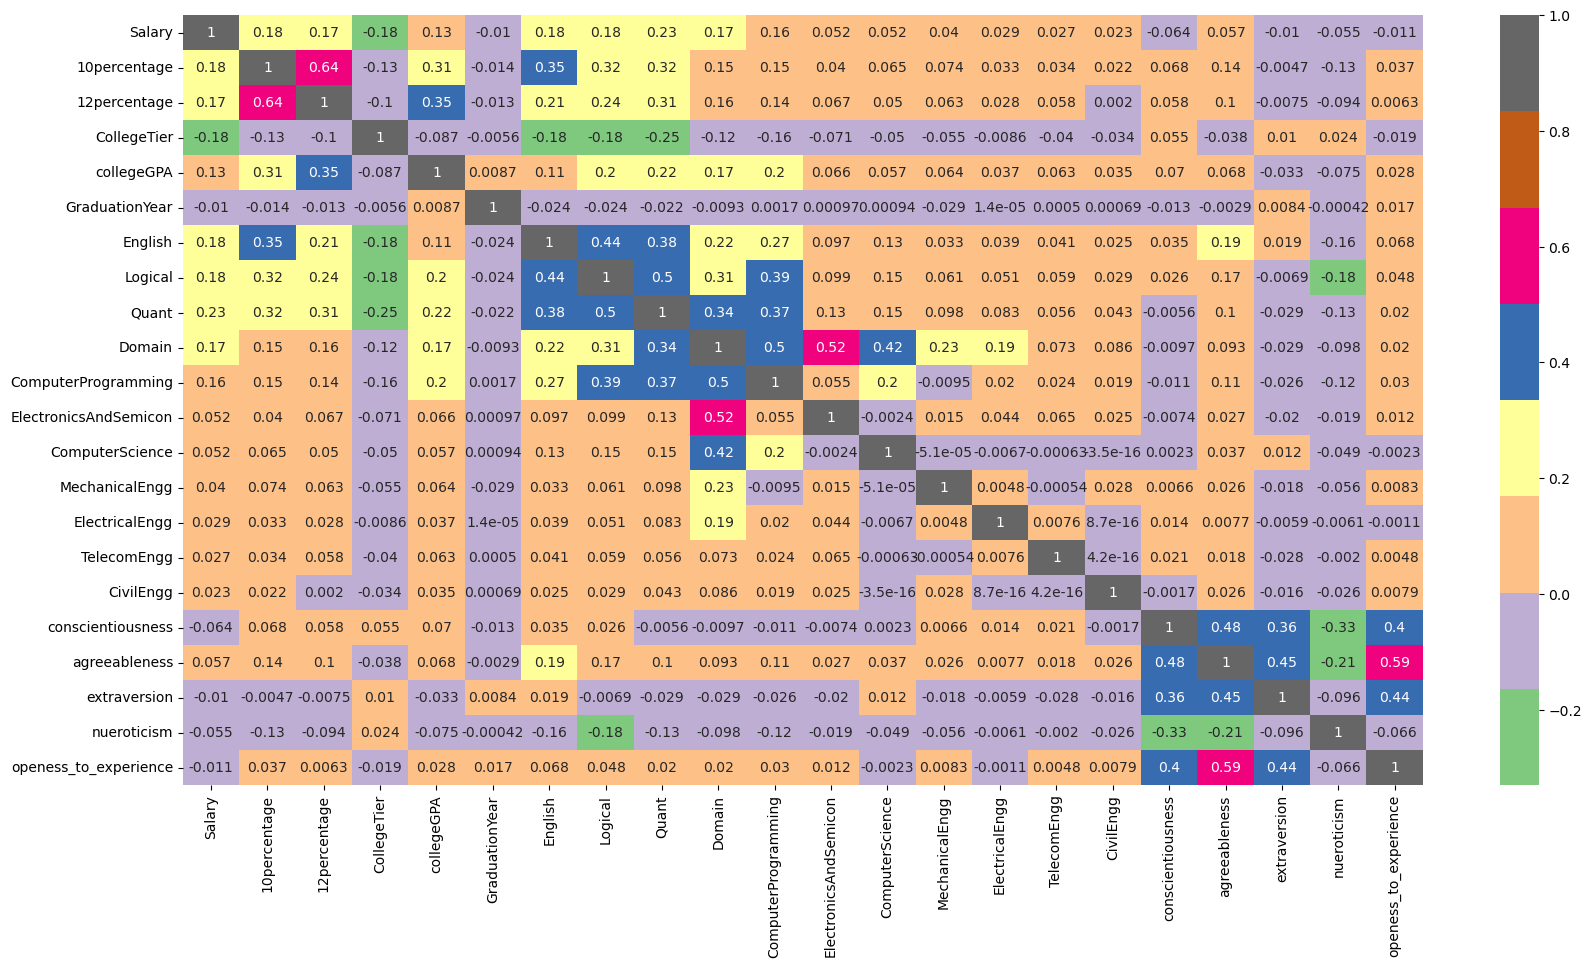

In [16]:
plt.figure(figsize=(20,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Accent)
plt.show()

In [17]:
num_df  = df.select_dtypes(include=['int64', 'float64']).columns

In [18]:
num_df

Index(['Salary', '10percentage', '12percentage', 'CollegeTier', 'collegeGPA',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

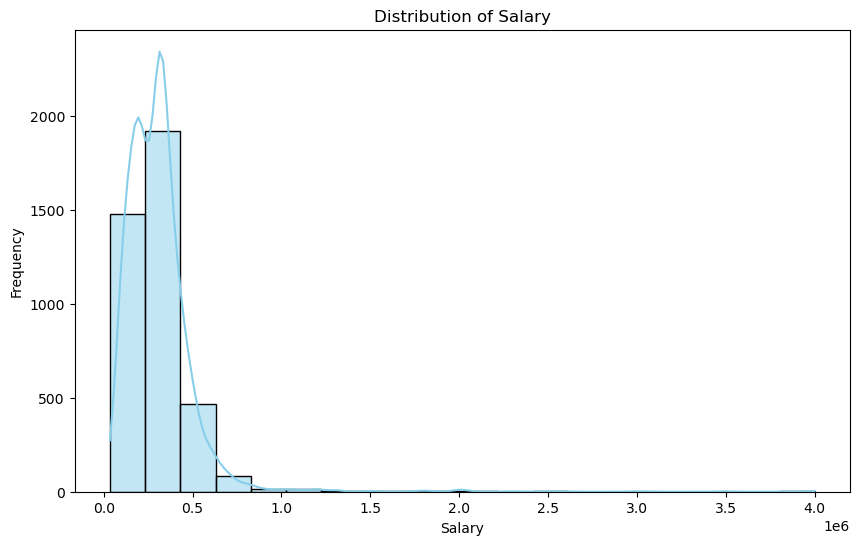

Descriptive Statistics for Salary:
count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64


In [20]:
# AS the Target variable is "Salary" let's do analysis on Salary 
# Univariate analysis of 'Salary'
plt.figure(figsize=(10, 6))

# Histogram
sns.histplot(df['Salary'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics
print("Descriptive Statistics for Salary:")
print(df['Salary'].describe())

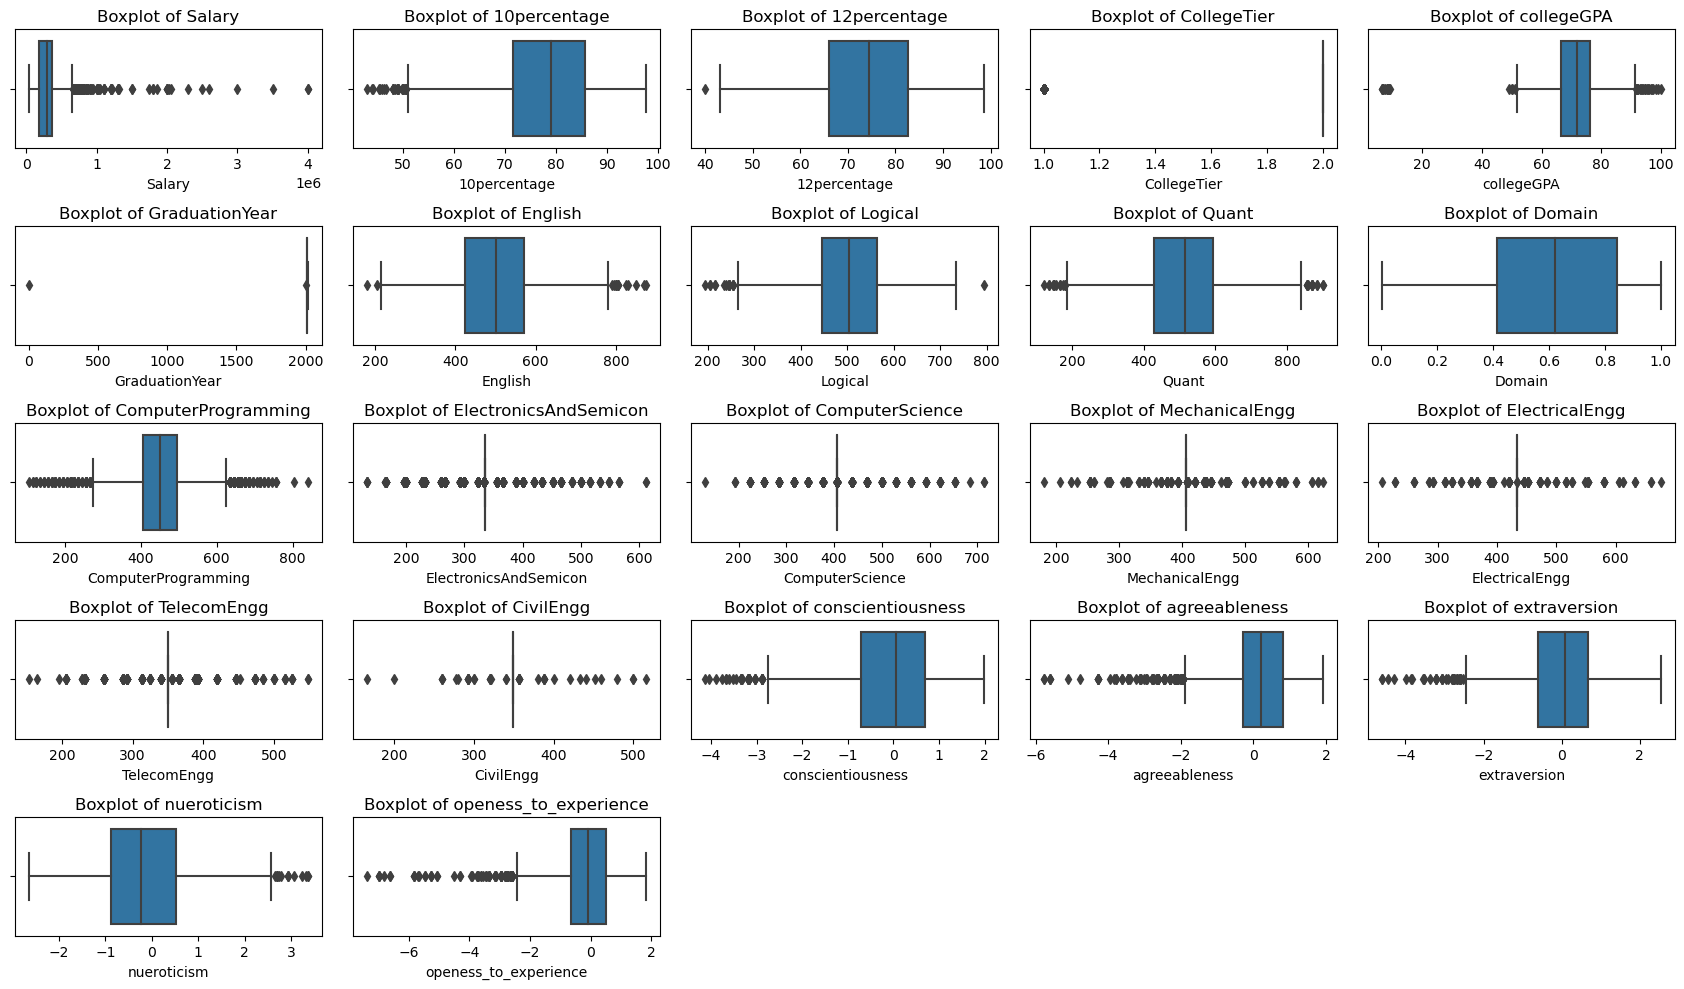

In [21]:
numerical_columns = ['Salary', '10percentage', '12percentage', 'CollegeTier', 'collegeGPA',
                     'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
                     'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
                     'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
                     'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
                     'openess_to_experience']

# Set up a grid of subplots for boxplots
plt.figure(figsize=(17, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


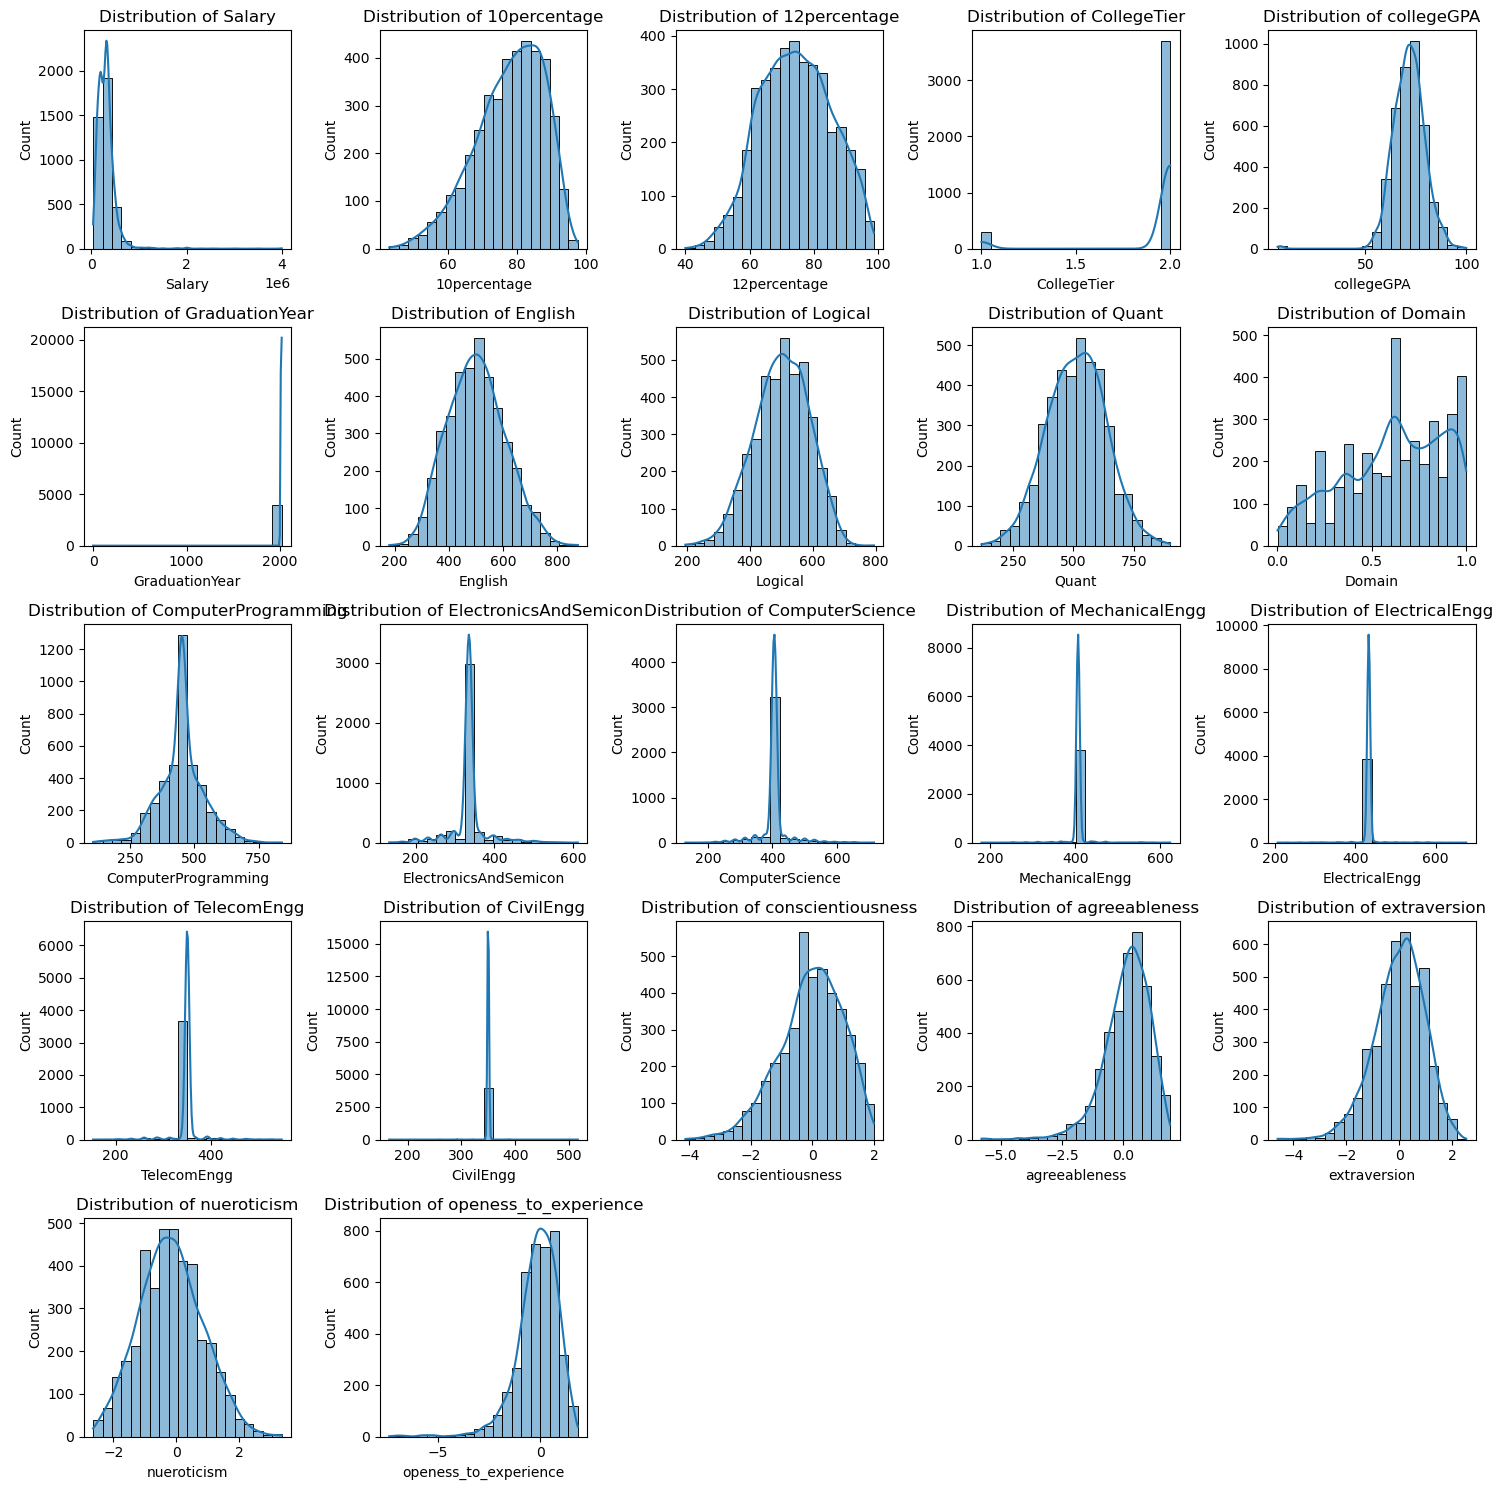

In [22]:
# List of numerical columns
numerical_columns = ['Salary', '10percentage', '12percentage', 'CollegeTier', 'collegeGPA',
                     'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
                     'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
                     'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
                     'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
                     'openess_to_experience']

# Set up a grid of subplots for histograms
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [23]:
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

In [24]:
cat_columns

['DOJ',
 'DOL',
 'Designation',
 'JobCity',
 'Gender',
 'DOB',
 'Degree',
 'Specialization']

In [25]:
df['DOJ'] =pd.to_datetime(df['DOJ'], format='%m/%d/%y', errors='coerce')

In [26]:
df['DOB'] = df['DOB'].apply(lambda x: re.sub(r'\b0:00\b', '', x))

In [27]:
df['DOB'] =pd.to_datetime(df['DOB'], format='%m/%d/%y', errors='coerce')

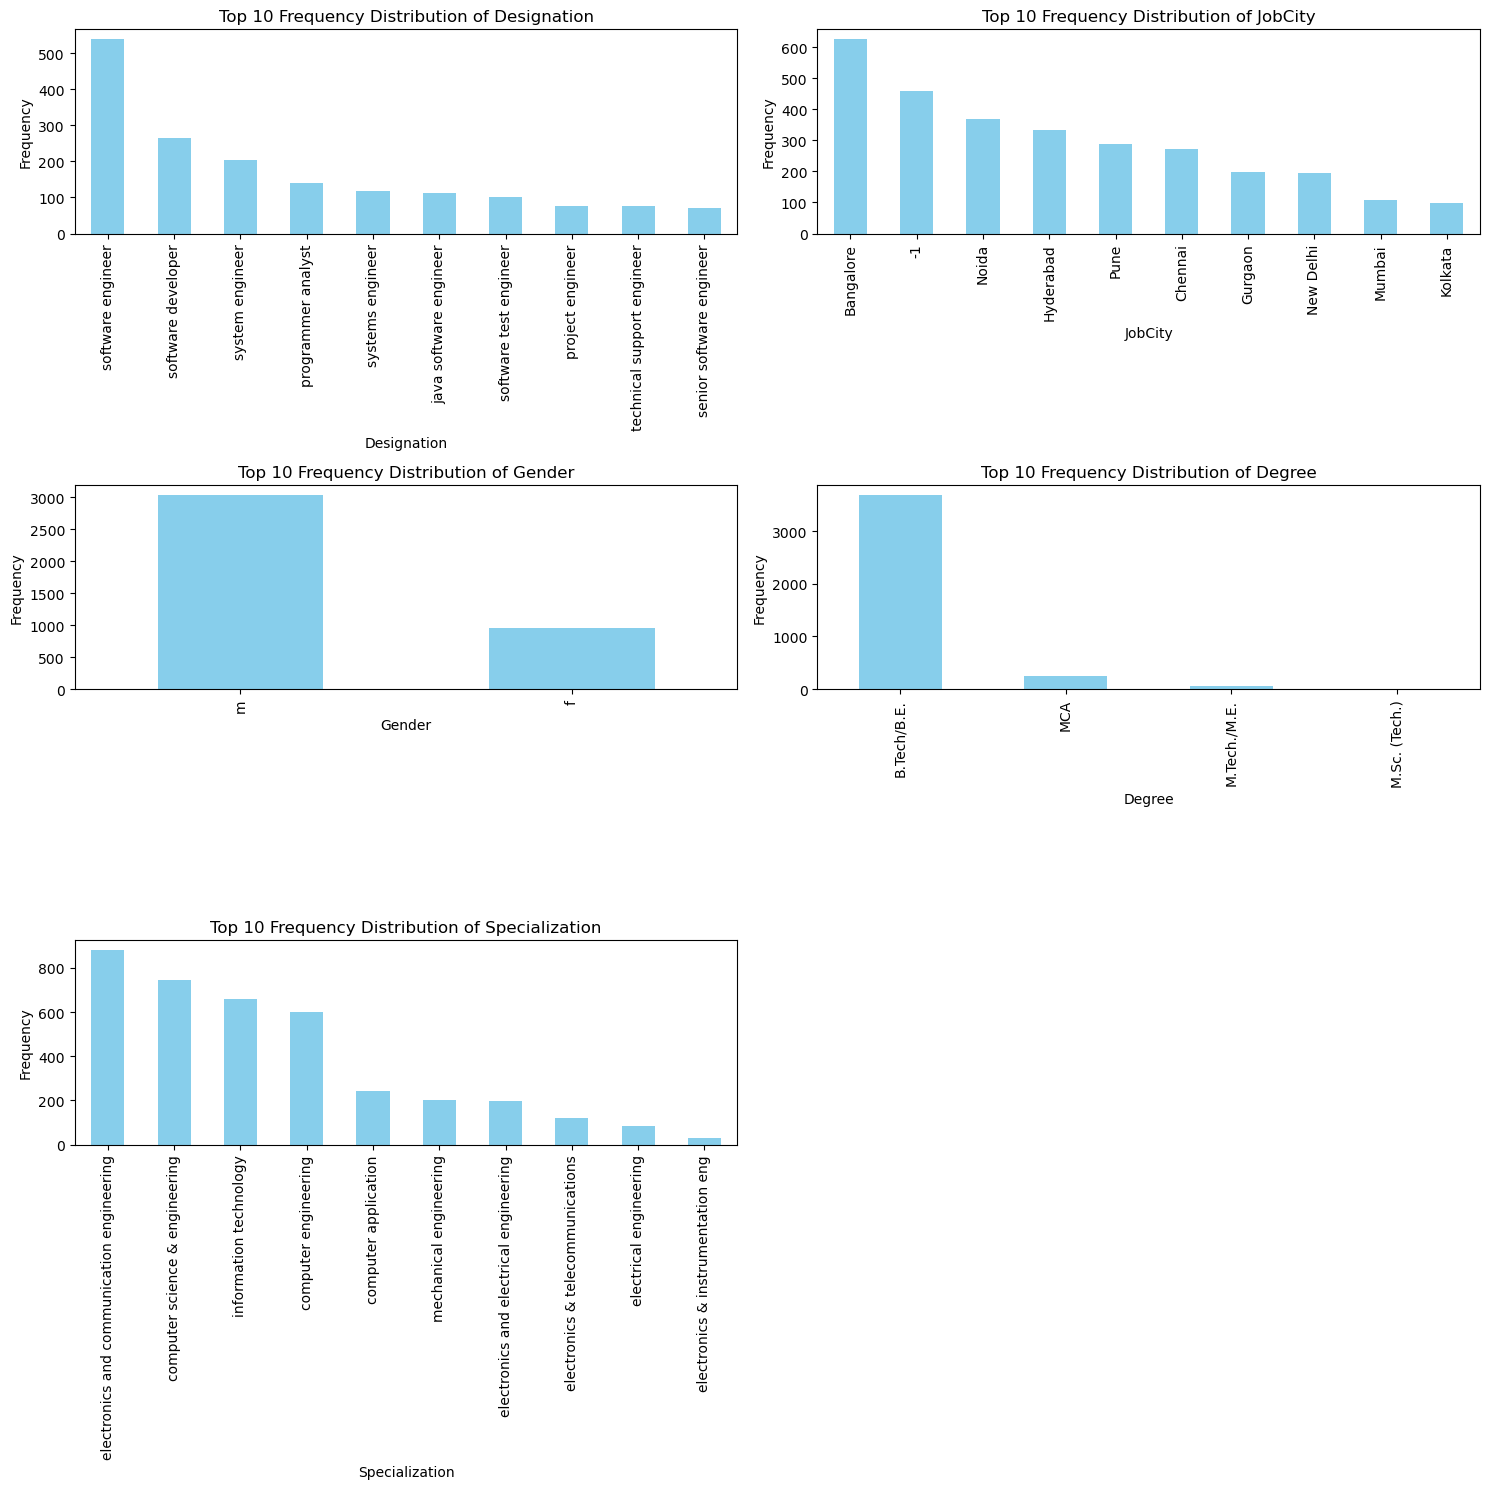

In [28]:
categorical_columns = [ 'Designation', 'JobCity', 'Gender', 'Degree', 'Specialization']

# Set up a grid of subplots for bar plots
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    df[column].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 Frequency Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Bivariate Analysis

## Numerical Vs Numerical Column


### Graduation Year Vs Salary

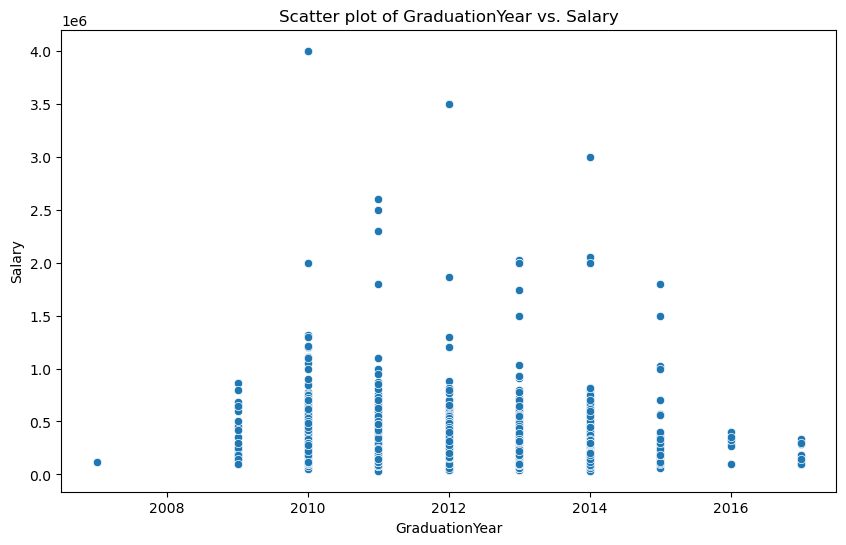

In [29]:
# Filter data for GraduationYear between 2000 and 2023

df_filtered = df[(df['GraduationYear'] >= 2000) & (df['GraduationYear'] <= 2023)]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GraduationYear', y='Salary', data=df_filtered)
plt.title('Scatter plot of GraduationYear vs. Salary')
plt.xlabel('GraduationYear')
plt.ylabel('Salary')
plt.show()

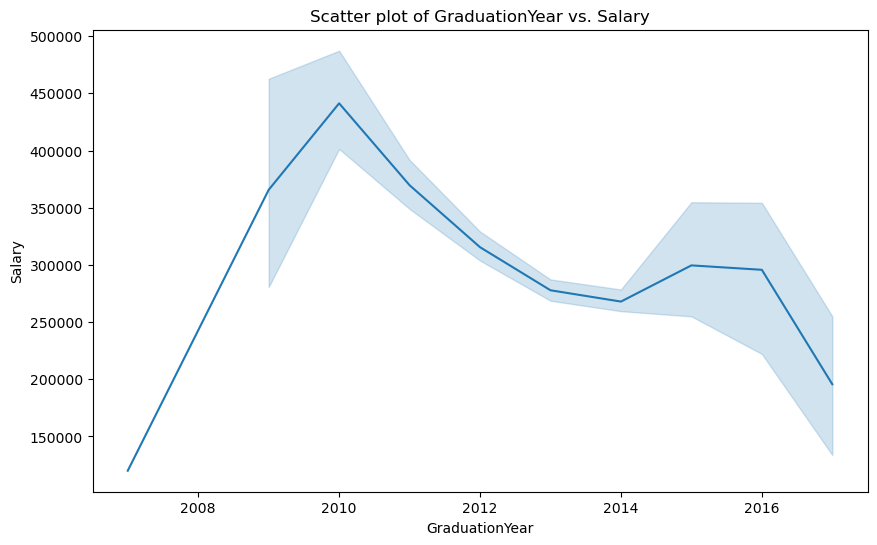

In [30]:
df_filtered = df[(df['GraduationYear'] >= 2000) & (df['GraduationYear'] <= 2023)]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='GraduationYear', y='Salary', data=df_filtered)
plt.title('Scatter plot of GraduationYear vs. Salary')
plt.xlabel('GraduationYear')
plt.ylabel('Salary')
plt.show()

### Computer Programming Vs Salary

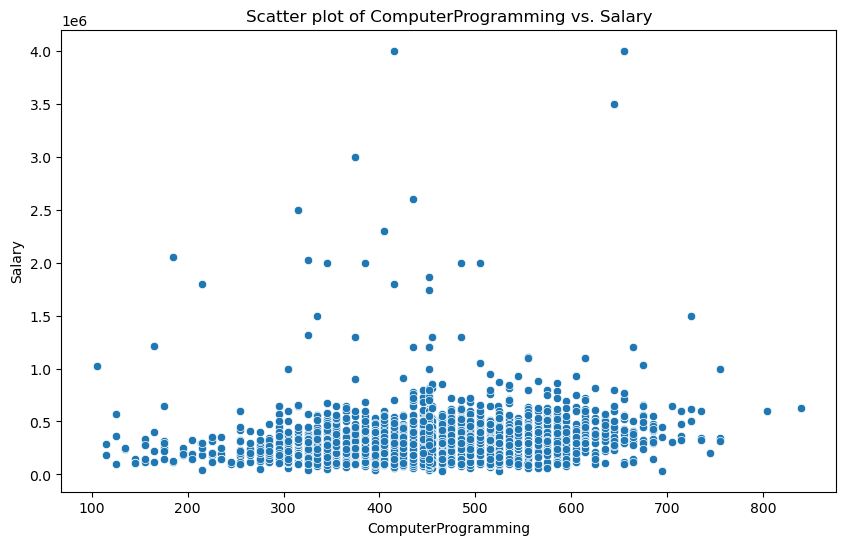

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ComputerProgramming', y='Salary', data=df)
plt.title('Scatter plot of ComputerProgramming vs. Salary')
plt.xlabel('ComputerProgramming')
plt.ylabel('Salary')
plt.show()

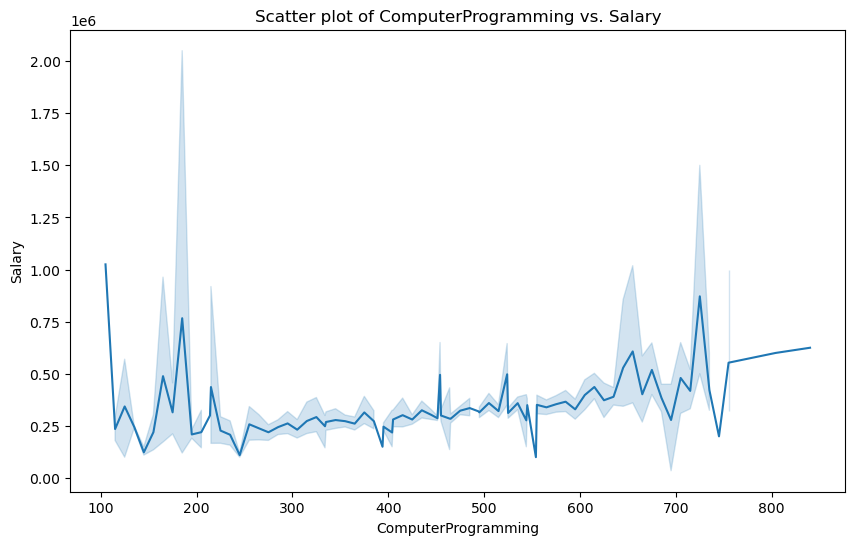

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='ComputerProgramming', y='Salary', data=df)
plt.title('Scatter plot of ComputerProgramming vs. Salary')
plt.xlabel('ComputerProgramming')
plt.ylabel('Salary')
plt.show()

### Categorical Column Vs Numerical Column

### Gender Vs Salary

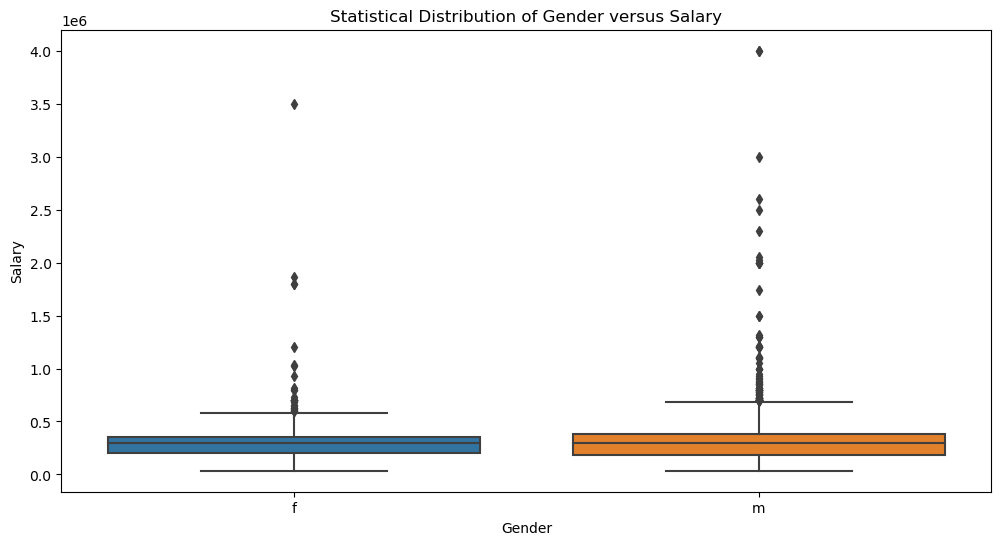

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot( x=df['Gender'], y=df['Salary'] )

plt.title('Statistical Distribution of Gender versus Salary')
plt.show()

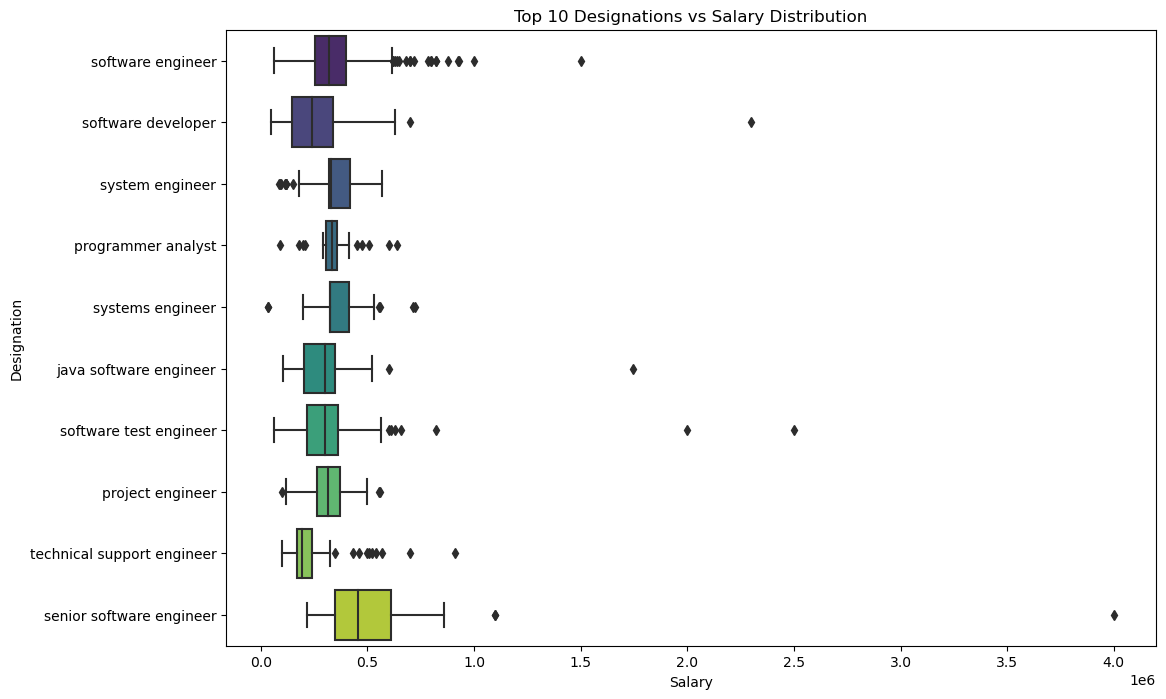

In [34]:
# Get the top 10 designations based on salary
top_10_designations = df['Designation'].value_counts().index[:10]

# Filter the DataFrame for the top 10 designations
df_top_10_designations = df[df['Designation'].isin(top_10_designations)]

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='Salary', y='Designation', data=df_top_10_designations, order=top_10_designations, palette='viridis')
plt.title('Top 10 Designations vs Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Designation')
plt.show()

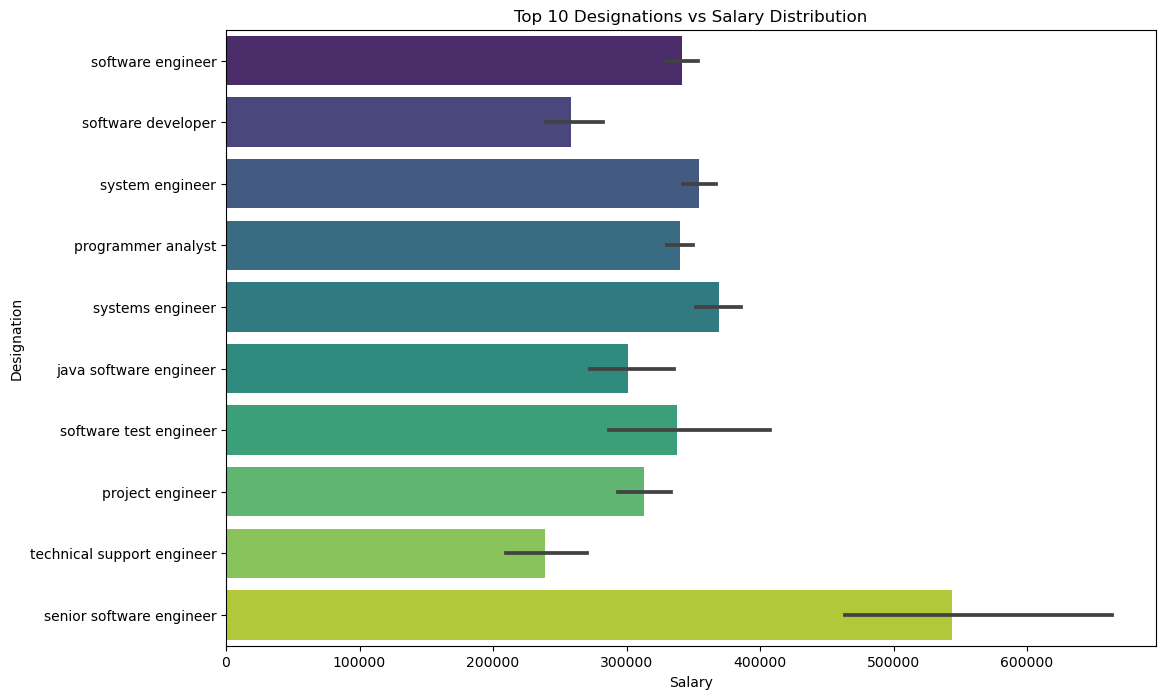

In [35]:
# Get the top 10 designations based on salary
top_10_designations = df['Designation'].value_counts().index[:10]

# Filter the DataFrame for the top 10 designations
df_top_10_designations = df[df['Designation'].isin(top_10_designations)]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Salary', y='Designation', data=df_top_10_designations, order=top_10_designations, palette='viridis')
plt.title('Top 10 Designations vs Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Designation')
plt.show()

### Job City Vs Salary

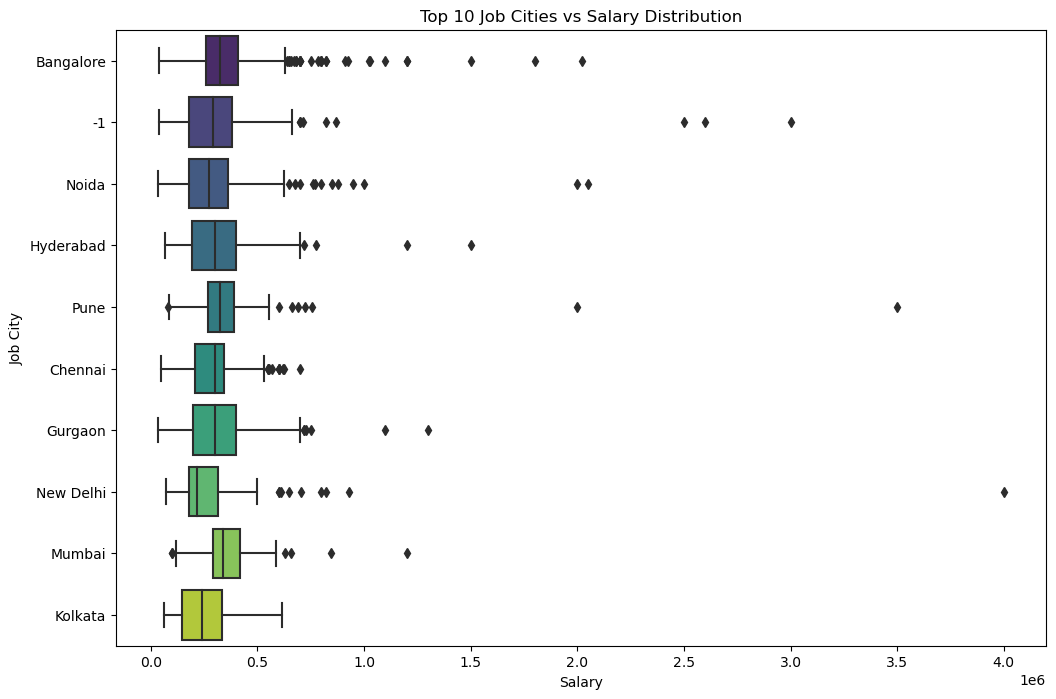

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Salary', y='JobCity', data=df, order=df['JobCity'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Job Cities vs Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Job City')
plt.show()

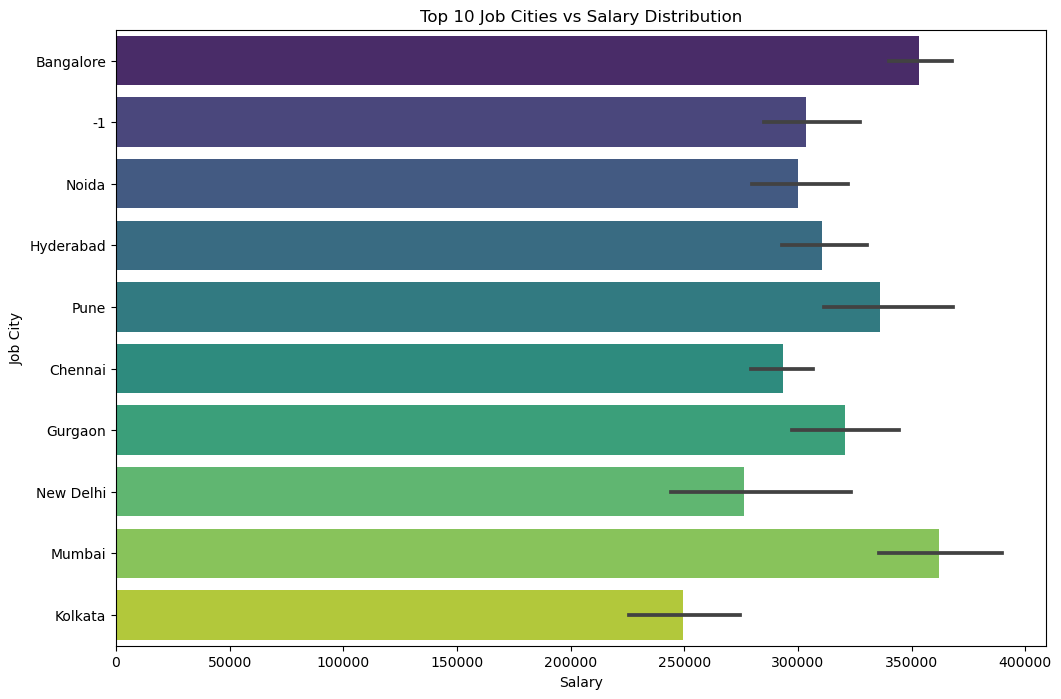

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Salary', y='JobCity', data=df, order=df['JobCity'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Job Cities vs Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Job City')
plt.show()

### Degree Vs Salary

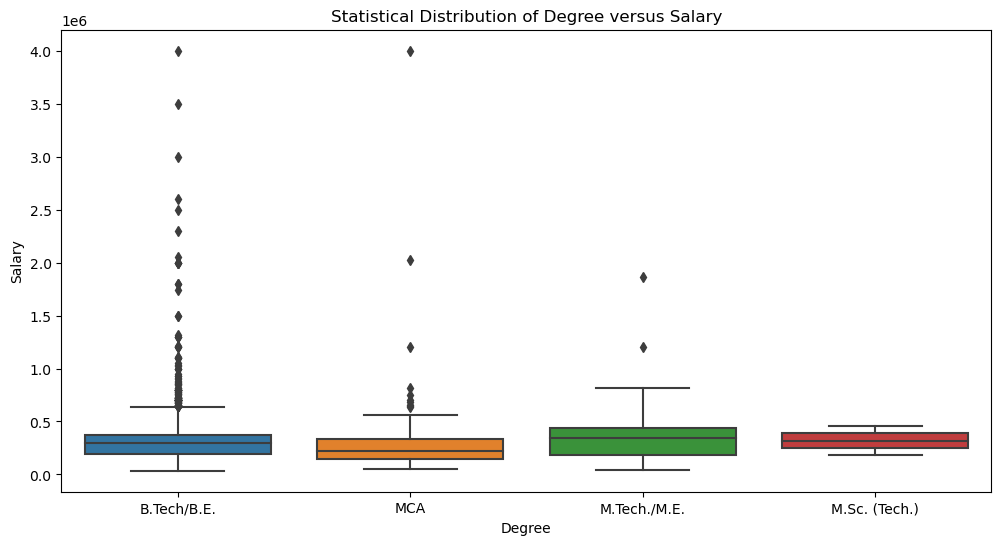

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot( x=df['Degree'], y=df['Salary'] )

plt.title('Statistical Distribution of Degree versus Salary')
plt.show()

### Categorical Vs Categorical Columns

#### Gender Vs Specialization 

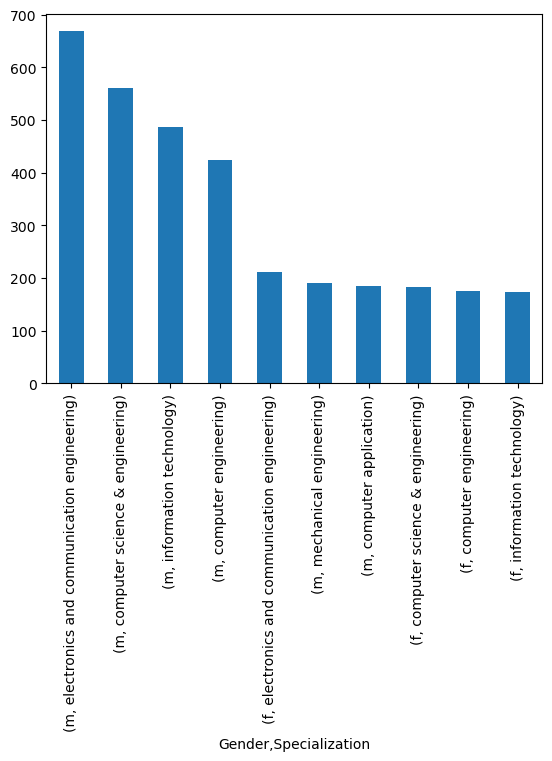

In [39]:
a = df.groupby("Gender")['Specialization'].value_counts().nlargest(10).plot(kind = "bar")

## - Research Questions

### Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you

### take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you 

### can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [40]:
relevent_jobs = ["programmer analyst","software engineer", "hardware engineer" , "associate engineer"]
df1 = df[(df["Degree"]=="B.Tech/B.E.") & (df["Specialization"] == "computer science & engineering") & (df["Designation"].isin(relevent_jobs))]

In [41]:
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,12percentage,CollegeTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
24,335000.0,NaT,6/1/15 0:00,programmer analyst,Hyderabad,m,NaT,88.0,90.0,2,...,346.000000,406.876596,433.037267,350.173797,349.666667,0.4155,0.8027,0.1357,-0.99500,-0.6692
31,340000.0,NaT,4/1/15 0:00,software engineer,Bangalore,m,NaT,77.2,86.1,2,...,407.000000,406.876596,433.037267,350.173797,349.666667,-0.0154,1.2114,1.0859,-1.50210,0.2889
48,390000.0,NaT,present,software engineer,Bangalore,m,NaT,86.6,75.0,2,...,346.000000,406.876596,433.037267,350.173797,349.666667,-2.5039,0.0328,0.3817,0.26793,0.5024
52,400000.0,NaT,present,software engineer,Navi Mumbai,m,NaT,85.2,81.5,2,...,405.636364,406.876596,433.037267,350.173797,349.666667,1.1336,0.3789,1.0859,0.65300,0.2889
55,250000.0,NaT,present,software engineer,Mangalore,m,NaT,90.8,90.1,2,...,376.000000,406.876596,433.037267,350.173797,349.666667,-0.3027,0.7119,-0.2974,1.16010,-0.4776


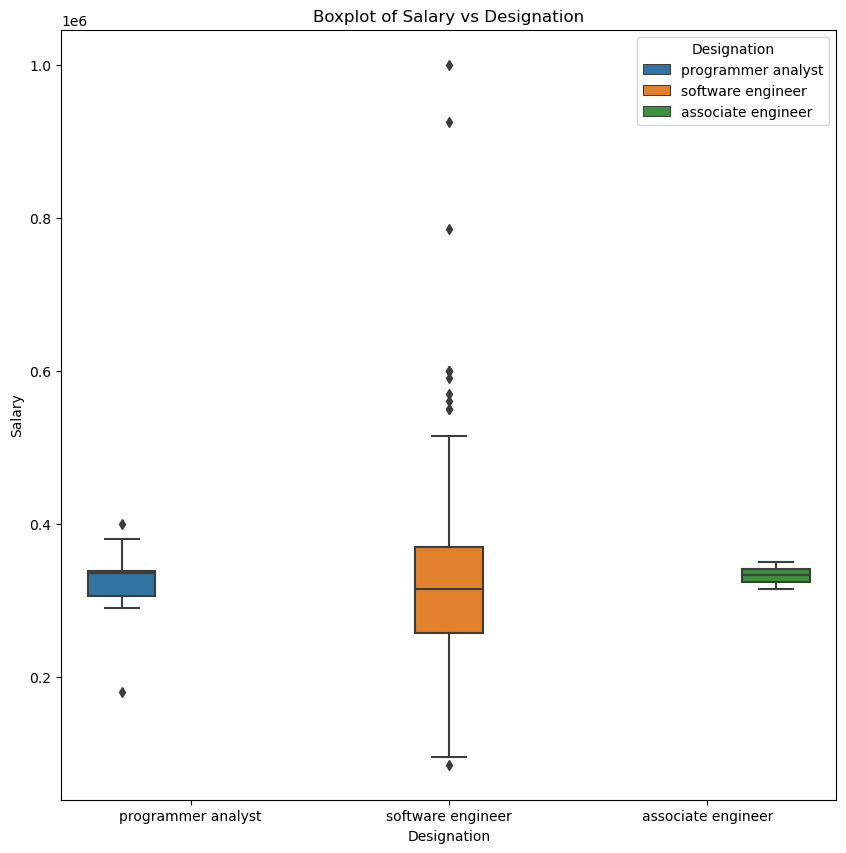

In [44]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df1, x="Designation", y="Salary", hue="Designation")
plt.title("Boxplot of Salary vs Designation")
plt.legend(title='Designation')  # Add legend with title
plt.show()